In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline



In [2]:
#membuat fungsi transfer orde 1 = 0.2083/(s+1.71)

In [3]:
fs10= 10
fs100= 100
fs1000= 1000

# bikin versi 10 Hz
B=[0.2083]
A=[1,1.71]
fs10_z   = signal.bilinear(B,A,fs=10)
fs10_a=fs10_z[1]
fs10_b=fs10_z[0]

In [4]:
fs10_t,fs10_y=signal.dstep((fs10_b,fs10_a,1/fs10),n=40)

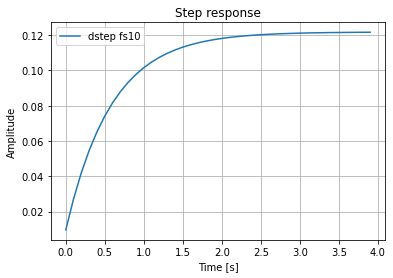

In [5]:
plt.plot(fs10_t,fs10_y[0],label='dstep fs10')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
plt.legend(loc='best')
plt.grid()

In [6]:
# bikin versi 100 Hz

In [7]:
B=[0.2083]
A=[1,1.71]
z   = signal.bilinear(B,A,fs=fs100)
fs100_a=z[1]
fs100_b=z[0]

In [8]:
z

(array([0.00103267, 0.00103267]), array([ 1.        , -0.98304497]))

In [10]:
fs100_t,fs100_y=signal.dstep((fs100_b,fs100_a,1/fs100),n=400)


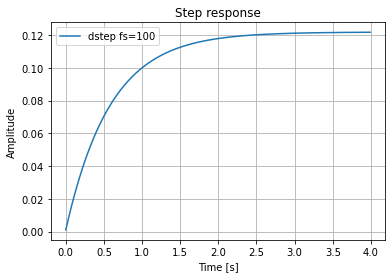

In [11]:
plt.plot(fs100_t,fs100_y[0],label='dstep fs=100')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
#plt.xlim((0,1))
plt.legend(loc='best')
plt.grid()

In [12]:
# bikin versi 1000 Hz


In [13]:
B=[0.2083]
A=[1,1.71]
z   = signal.bilinear(B,A,fs=fs1000)
fs1000_a=z[1]
fs1000_b=z[0]

In [14]:
fs1000_t,fs1000_y=signal.dstep((fs1000_b,fs1000_a,1/fs1000),n=4000)


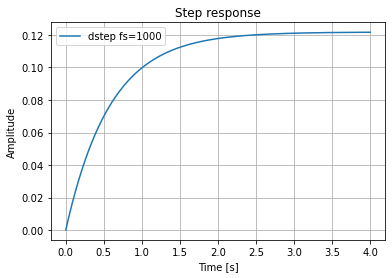

In [15]:
plt.plot(fs1000_t,fs1000_y[0],label='dstep fs=1000')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
#plt.xlim((0,1))
plt.legend(loc='best')
plt.grid()

In [16]:
z

(array([0.00010406, 0.00010406]), array([ 1.        , -0.99829146]))

In [17]:
yn1=0
xn1=0
xn=0
yn=0
sim_t=[]
sim_y=[]
for i in range(0,40):
    t=i*.1
    xn=1.0 # step function
    yn = yn1 * 0.84246891 + xn * 0.00959466 + xn1 * 0.00959466    
    yn1=yn
    xn1=xn
    print("{:.2f} {:.2f}".format(t,yn))
    sim_t.append(t)
    sim_y.append(yn)
    

0.00 0.01
0.10 0.03
0.20 0.04
0.30 0.05
0.40 0.07
0.50 0.07
0.60 0.08
0.70 0.09
0.80 0.09
0.90 0.10
1.00 0.10
1.10 0.10
1.20 0.11
1.30 0.11
1.40 0.11
1.50 0.11
1.60 0.11
1.70 0.12
1.80 0.12
1.90 0.12
2.00 0.12
2.10 0.12
2.20 0.12
2.30 0.12
2.40 0.12
2.50 0.12
2.60 0.12
2.70 0.12
2.80 0.12
2.90 0.12
3.00 0.12
3.10 0.12
3.20 0.12
3.30 0.12
3.40 0.12
3.50 0.12
3.60 0.12
3.70 0.12
3.80 0.12
3.90 0.12


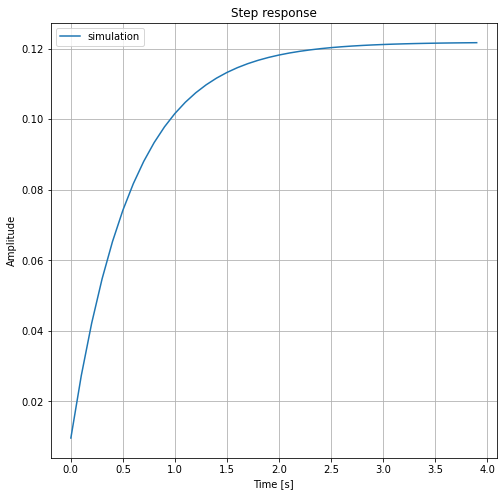

In [20]:
plt.figure(figsize=(8, 8))
plt.plot(sim_t,sim_y,label='simulation')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
#plt.xlim((0,1))
plt.legend(loc='best')
plt.grid()

In [28]:
yn1=0
yn2=0
xn1=0
xn2=0
output=0
error=0

fs10_all_t   = []
fs10_all_out = []
dt = 0.1
for i in range (0,10000):
    t=i*dt-1
    if t<0:
        input=0
    else:
        input=1
    if t>10:
        break        
    error=input-output
    xn=13.71 * error
    yn = yn1 * 0.84246891 + xn * 0.00959466 + xn1 * 0.00959466    
    yn2=yn1
    yn1=yn
    xn1=xn    
 # integrator
    output = output+(yn1+yn2)/2 * dt   
    print ("{:.2f} {:.3f} {:.3f} {:.3f}".format(t,error,xn,output))    
    fs10_all_t.append(t)
    fs10_all_out.append(output)    

-1.00 0.000 0.000 0.000
-0.90 0.000 0.000 0.000
-0.80 0.000 0.000 0.000
-0.70 0.000 0.000 0.000
-0.60 0.000 0.000 0.000
-0.50 0.000 0.000 0.000
-0.40 0.000 0.000 0.000
-0.30 0.000 0.000 0.000
-0.20 0.000 0.000 0.000
-0.10 0.000 0.000 0.000
0.00 1.000 13.710 0.007
0.10 0.993 13.620 0.032
0.20 0.968 13.274 0.079
0.30 0.921 12.626 0.144
0.40 0.856 11.733 0.223
0.50 0.777 10.650 0.312
0.60 0.688 9.430 0.408
0.70 0.592 8.123 0.506
0.80 0.494 6.774 0.604
0.90 0.396 5.425 0.700
1.00 0.300 4.110 0.791
1.10 0.209 2.859 0.876
1.20 0.124 1.696 0.953
1.30 0.047 0.641 1.021
1.40 -0.021 -0.293 1.080
1.50 -0.080 -1.098 1.129
1.60 -0.129 -1.769 1.168
1.70 -0.168 -2.306 1.198
1.80 -0.198 -2.713 1.219
1.90 -0.219 -2.996 1.231
2.00 -0.231 -3.164 1.235
2.10 -0.235 -3.228 1.233
2.20 -0.233 -3.199 1.225
2.30 -0.225 -3.090 1.213
2.40 -0.213 -2.914 1.196
2.50 -0.196 -2.686 1.176
2.60 -0.176 -2.417 1.155
2.70 -0.155 -2.120 1.132
2.80 -0.132 -1.807 1.108
2.90 -0.108 -1.487 1.085
3.00 -0.085 -1.170 1.063
3.10 -0

In [29]:
yn1=0
yn2=0
xn1=0
xn2=0
output=0
error=0

fs100_all_t   = []
fs100_all_out = []
dt = 0.01
for i in range (0,10000):
    t=i*dt-1
    if t<0:
        input=0
    else:
        input=1
    if t>10:
        break        
        
    error=input-output
    xn=13.71 * error
    yn = yn1 * 0.98304497 + xn * 0.00103267 + xn1 * 0.00103267 
    yn2=yn1
    yn1=yn
    xn1=xn    
 # integrator
    output = output+(yn1+yn2)/2 * dt   
    print ("{:.2f} {:.3f} {:.3f} {:.3f}".format(t,error,xn,output))    
    fs100_all_t.append(t)
    fs100_all_out.append(output)    

-1.00 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.96 0.000 0.000 0.000
-0.95 0.000 0.000 0.000
-0.94 0.000 0.000 0.000
-0.93 0.000 0.000 0.000
-0.92 0.000 0.000 0.000
-0.91 0.000 0.000 0.000
-0.90 0.000 0.000 0.000
-0.89 0.000 0.000 0.000
-0.88 0.000 0.000 0.000
-0.87 0.000 0.000 0.000
-0.86 0.000 0.000 0.000
-0.85 0.000 0.000 0.000
-0.84 0.000 0.000 0.000
-0.83 0.000 0.000 0.000
-0.82 0.000 0.000 0.000
-0.81 0.000 0.000 0.000
-0.80 0.000 0.000 0.000
-0.79 0.000 0.000 0.000
-0.78 0.000 0.000 0.000
-0.77 0.000 0.000 0.000
-0.76 0.000 0.000 0.000
-0.75 0.000 0.000 0.000
-0.74 0.000 0.000 0.000
-0.73 0.000 0.000 0.000
-0.72 0.000 0.000 0.000
-0.71 0.000 0.000 0.000
-0.70 0.000 0.000 0.000
-0.69 0.000 0.000 0.000
-0.68 0.000 0.000 0.000
-0.67 0.000 0.000 0.000
-0.66 0.000 0.000 0.000
-0.65 0.000 0.000 0.000
-0.64 0.000 0.000 0.000
-0.63 0.000 0.000 0.000
-0.62 0.000 0.000 0.000
-0.61 0.000 0.000 0.000
-0.60 0.000 0.000 0.000
-0.59 0.000 0.00

In [30]:
yn1=0
yn2=0
xn1=0
xn2=0
output=0
error=0

fs1000_all_t   = []
fs1000_all_out = []
dt = 0.001
for i in range (0,10000):
    t=i*dt-1
    if t<0:
        input=0
    else:
        input=1
    error=input-output
    xn=13.71 * error
    
#    xn=1.0 # step function
#    yn = yn1 * 0.84246891 + xn * 0.00959466 + xn1 * 0.00959466    
#    yn = yn1 * 0.98304497 + xn * 0.00103267 + xn1 * 0.00103267 
    yn = yn1 * 0.99829146 + xn * 0.00010406 + xn1 * 0.00010406     
    yn2=yn1
    yn1=yn
    xn1=xn    
 # integrator
    output = output+(yn1+yn2)/2 * dt   
    print ("{:.2f} {:.3f} {:.3f} {:.3f}".format(t,error,xn,output))    
    fs1000_all_t.append(t)
    fs1000_all_out.append(output)    

-1.00 0.000 0.000 0.000
-1.00 0.000 0.000 0.000
-1.00 0.000 0.000 0.000
-1.00 0.000 0.000 0.000
-1.00 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.99 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.98 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.97 0.000 0.000 0.000
-0.96 0.000 0.000 0.000
-0.96 0.000 0.000 0.000
-0.96 0.000 0.000 0.000
-0.96 0.000 0.000 0.000
-0.96 0.000 0.000 0.000
-0.96 0.000 0.000 0.000
-0.96 0.000 0.00

1.05 0.257 3.520 0.744
1.05 0.256 3.509 0.745
1.05 0.255 3.498 0.746
1.05 0.254 3.487 0.746
1.05 0.254 3.476 0.747
1.05 0.253 3.465 0.748
1.05 0.252 3.454 0.749
1.06 0.251 3.443 0.750
1.06 0.250 3.432 0.750
1.06 0.250 3.421 0.751
1.06 0.249 3.410 0.752
1.06 0.248 3.400 0.753
1.06 0.247 3.389 0.754
1.06 0.246 3.378 0.754
1.06 0.246 3.367 0.755
1.06 0.245 3.356 0.756
1.06 0.244 3.345 0.757
1.06 0.243 3.334 0.758
1.07 0.242 3.324 0.758
1.07 0.242 3.313 0.759
1.07 0.241 3.302 0.760
1.07 0.240 3.291 0.761
1.07 0.239 3.280 0.762
1.07 0.238 3.270 0.762
1.07 0.238 3.259 0.763
1.07 0.237 3.248 0.764
1.07 0.236 3.237 0.765
1.08 0.235 3.227 0.765
1.08 0.235 3.216 0.766
1.08 0.234 3.205 0.767
1.08 0.233 3.195 0.768
1.08 0.232 3.184 0.769
1.08 0.231 3.173 0.769
1.08 0.231 3.162 0.770
1.08 0.230 3.152 0.771
1.08 0.229 3.141 0.772
1.08 0.228 3.131 0.772
1.08 0.228 3.120 0.773
1.09 0.227 3.109 0.774
1.09 0.226 3.099 0.775
1.09 0.225 3.088 0.776
1.09 0.224 3.077 0.776
1.09 0.224 3.067 0.777
1.09 0.223 

3.38 -0.020 -0.269 1.020
3.38 -0.020 -0.267 1.019
3.38 -0.019 -0.266 1.019
3.39 -0.019 -0.264 1.019
3.39 -0.019 -0.263 1.019
3.39 -0.019 -0.262 1.019
3.39 -0.019 -0.260 1.019
3.39 -0.019 -0.259 1.019
3.39 -0.019 -0.257 1.019
3.39 -0.019 -0.256 1.019
3.39 -0.019 -0.254 1.018
3.39 -0.018 -0.253 1.018
3.40 -0.018 -0.251 1.018
3.40 -0.018 -0.250 1.018
3.40 -0.018 -0.249 1.018
3.40 -0.018 -0.247 1.018
3.40 -0.018 -0.246 1.018
3.40 -0.018 -0.244 1.018
3.40 -0.018 -0.243 1.018
3.40 -0.018 -0.241 1.018
3.40 -0.018 -0.240 1.017
3.40 -0.017 -0.239 1.017
3.41 -0.017 -0.237 1.017
3.41 -0.017 -0.236 1.017
3.41 -0.017 -0.234 1.017
3.41 -0.017 -0.233 1.017
3.41 -0.017 -0.231 1.017
3.41 -0.017 -0.230 1.017
3.41 -0.017 -0.229 1.017
3.41 -0.017 -0.227 1.016
3.41 -0.016 -0.226 1.016
3.41 -0.016 -0.224 1.016
3.42 -0.016 -0.223 1.016
3.42 -0.016 -0.222 1.016
3.42 -0.016 -0.220 1.016
3.42 -0.016 -0.219 1.016
3.42 -0.016 -0.217 1.016
3.42 -0.016 -0.216 1.016
3.42 -0.016 -0.215 1.016
3.42 -0.016 -0.213 1.015


5.58 0.002 0.033 0.998
5.58 0.002 0.033 0.998
5.58 0.002 0.033 0.998
5.58 0.002 0.033 0.998
5.58 0.002 0.032 0.998
5.58 0.002 0.032 0.998
5.58 0.002 0.032 0.998
5.59 0.002 0.032 0.998
5.59 0.002 0.032 0.998
5.59 0.002 0.031 0.998
5.59 0.002 0.031 0.998
5.59 0.002 0.031 0.998
5.59 0.002 0.031 0.998
5.59 0.002 0.030 0.998
5.59 0.002 0.030 0.998
5.59 0.002 0.030 0.998
5.59 0.002 0.030 0.998
5.60 0.002 0.030 0.998
5.60 0.002 0.029 0.998
5.60 0.002 0.029 0.998
5.60 0.002 0.029 0.998
5.60 0.002 0.029 0.998
5.60 0.002 0.028 0.998
5.60 0.002 0.028 0.998
5.60 0.002 0.028 0.998
5.60 0.002 0.028 0.998
5.61 0.002 0.028 0.998
5.61 0.002 0.027 0.998
5.61 0.002 0.027 0.998
5.61 0.002 0.027 0.998
5.61 0.002 0.027 0.998
5.61 0.002 0.027 0.998
5.61 0.002 0.026 0.998
5.61 0.002 0.026 0.998
5.61 0.002 0.026 0.998
5.61 0.002 0.026 0.998
5.62 0.002 0.026 0.998
5.62 0.002 0.025 0.998
5.62 0.002 0.025 0.998
5.62 0.002 0.025 0.998
5.62 0.002 0.025 0.998
5.62 0.002 0.024 0.998
5.62 0.002 0.024 0.998
5.62 0.002 

7.67 -0.001 -0.008 1.001
7.67 -0.001 -0.008 1.001
7.67 -0.001 -0.007 1.001
7.67 -0.001 -0.007 1.001
7.68 -0.001 -0.007 1.001
7.68 -0.001 -0.007 1.001
7.68 -0.001 -0.007 1.001
7.68 -0.001 -0.007 1.001
7.68 -0.001 -0.007 1.001
7.68 -0.001 -0.007 1.001
7.68 -0.001 -0.007 1.001
7.68 -0.001 -0.007 1.001
7.68 -0.001 -0.007 1.001
7.68 -0.001 -0.007 1.001
7.69 -0.001 -0.007 1.001
7.69 -0.001 -0.007 1.001
7.69 -0.001 -0.007 1.001
7.69 -0.001 -0.007 1.001
7.69 -0.001 -0.007 1.000
7.69 -0.000 -0.007 1.000
7.69 -0.000 -0.007 1.000
7.69 -0.000 -0.007 1.000
7.69 -0.000 -0.007 1.000
7.69 -0.000 -0.007 1.000
7.70 -0.000 -0.007 1.000
7.70 -0.000 -0.007 1.000
7.70 -0.000 -0.007 1.000
7.70 -0.000 -0.007 1.000
7.70 -0.000 -0.007 1.000
7.70 -0.000 -0.006 1.000
7.70 -0.000 -0.006 1.000
7.70 -0.000 -0.006 1.000
7.70 -0.000 -0.006 1.000
7.70 -0.000 -0.006 1.000
7.71 -0.000 -0.006 1.000
7.71 -0.000 -0.006 1.000
7.71 -0.000 -0.006 1.000
7.71 -0.000 -0.006 1.000
7.71 -0.000 -0.006 1.000
7.71 -0.000 -0.006 1.000


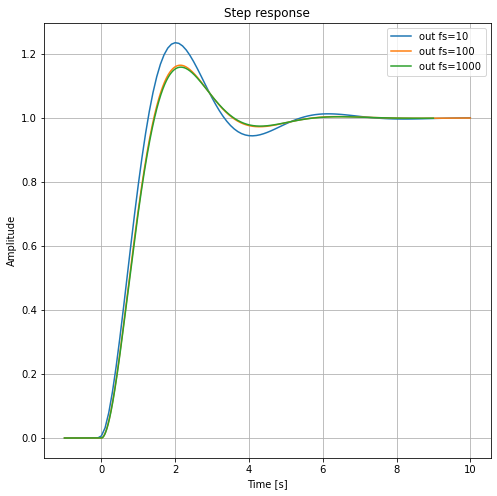

In [32]:
plt.figure(figsize=(8, 8))
plt.plot(fs10_all_t,fs10_all_out,label='out fs=10')
plt.plot(fs100_all_t,fs100_all_out,label='out fs=100')
plt.plot(fs1000_all_t,fs1000_all_out,label='out fs=1000')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
#plt.xlim((0,1))
plt.legend(loc='best')
plt.grid()

In [44]:
yn1=0
yn2=0
xn1=0
xn2=0
y=0
times  = []
output = []
for i in range (0,100):
    t=i*0.1-1
    if t<0:
        input=0
    else:
        input=1
    error=input-y
    x=13.71 * error
    y = 1.843 * yn1 - 0.843 * yn2 + 9.846e-4 * xn1 + 9.30447e-4 * xn2
    xn2=xn1
    xn1=x
    yn2=yn1
    yn1=y
    
    print ("{} {:.3f} {:.3f} {:.3f}".format(i,t,x,y))
    
    output.append(y)
    times.append(t)

0 -1.000 0.000 0.000
1 -0.900 0.000 0.000
2 -0.800 0.000 0.000
3 -0.700 0.000 0.000
4 -0.600 0.000 0.000
5 -0.500 0.000 0.000
6 -0.400 0.000 0.000
7 -0.300 0.000 0.000
8 -0.200 0.000 0.000
9 -0.100 0.000 0.000
10 0.000 13.710 0.000
11 0.100 13.710 0.013
12 0.200 13.525 0.051
13 0.300 13.009 0.109
14 0.400 12.217 0.183
15 0.500 11.200 0.270
16 0.600 10.013 0.365
17 0.700 8.705 0.466
18 0.800 7.324 0.569
19 0.900 5.915 0.671
20 1.000 4.517 0.769
21 1.100 3.165 0.862
22 1.200 1.889 0.948
23 1.300 0.714 1.025
24 1.400 -0.344 1.093
25 1.500 -1.269 1.150
26 1.600 -2.053 1.196
27 1.700 -2.692 1.233
28 1.800 -3.188 1.258
29 1.900 -3.543 1.275
30 2.000 -3.764 1.282
31 2.100 -3.863 1.281
32 2.200 -3.850 1.273
33 2.300 -3.739 1.259
34 2.400 -3.544 1.239
35 2.500 -3.280 1.216
36 2.600 -2.962 1.190
37 2.700 -2.605 1.162
38 2.800 -2.222 1.133
39 2.900 -1.825 1.104
40 3.000 -1.428 1.076
41 3.100 -1.041 1.049
42 3.200 -0.671 1.024
43 3.300 -0.328 1.001
44 3.400 -0.016 0.981
45 3.500 0.260 0.964
46 3.6

In [45]:
 #baca file excel

In [50]:
# import pandas lib as pd
import pandas as pd
# read by default 1st sheet of an excel file
df = pd.read_excel('zoh.xlsx') 
print(df)


     time  PID Controller:1  Step:1     Sum:1  Transfer Fcn:1  time.1  \
0     0.0          0.000000       0  0.000000        0.000000     0.0   
1     0.1          0.000000       0  0.000000        0.000000     0.1   
2     0.2          0.000000       0  0.000000        0.000000     0.2   
3     0.3          0.000000       0  0.000000        0.000000     0.3   
4     0.4          0.000000       0  0.000000        0.000000     0.4   
..    ...               ...     ...       ...             ...     ...   
98    9.6          0.013835       1  0.001064        0.998936     9.8   
99    9.7          0.014081       1  0.001083        0.998917     9.9   
100   9.8          0.013940       1  0.001072        0.998928    10.0   
101   9.9          0.013473       1  0.001036        0.998964     NaN   
102  10.0          0.012738       1  0.000980        0.999020     NaN   

     Zero-Order Hold:1  
0             0.000000  
1             0.000000  
2             0.000000  
3             0.000000 

In [52]:
df['time']

0       0.0
1       0.1
2       0.2
3       0.3
4       0.4
       ... 
98      9.6
99      9.7
100     9.8
101     9.9
102    10.0
Name: time, Length: 103, dtype: float64

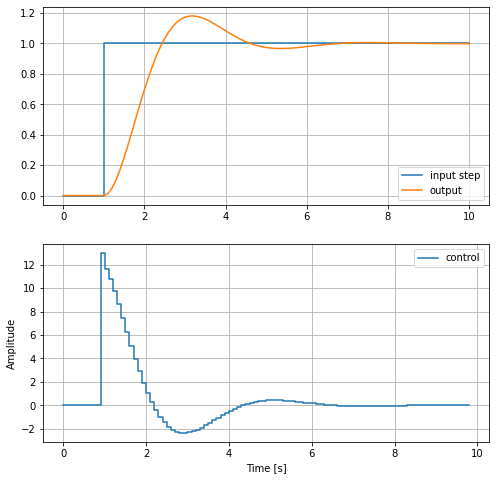

In [67]:
#plt.figure(figsize=(8, 8))
figure, axis = plt.subplots(2, 1, figsize=(8, 8)) 
axis[0].plot(df['time'],df['Step:1'],label='input step')
axis[0].plot(df['time'],df['Transfer Fcn:1'],label='output')
axis[0].grid()
axis[0].legend(loc='best')
axis[1].step(df['time'],df['Zero-Order Hold:1'],label='control')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.grid()
figure.savefig("chapter13.jpg",dpi=300)